<a href="https://colab.research.google.com/github/BenjaAR/lab05_md/blob/main/Copia_de_LAB05_AQUINO_REYES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **LABORATORIO CALIFICADO**

SEMANA 5: MODELOS DE APRENDIZAJE AUTOMÁTICO. MODELOS DE APRENDIZAJE
PROFUNDO

Alumno: Aquino Reyes Benjy Alvaro


In [ ]:
pip install ucimlrepo

In [20]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
from ucimlrepo import fetch_ucirepo

1. Importación de los datos

In [21]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# variable information
breast_cancer_wisconsin_original.variables


,name,role,type,demographic,description,units,missing_values
0,Sample_code_number,ID,Categorical,None,None,None,no
1,Clump_thickness,Feature,Integer,None,None,None,no
2,Uniformity_of_cell_size,Feature,Integer,None,None,None,no
3,Uniformity_of_cell_shape,Feature,Integer,None,None,None,no
4,Marginal_adhesion,Feature,Integer,None,None,None,no
5,Single_epithelial_cell_size,Feature,Integer,None,None,None,no
6,Bare_nuclei,Feature,Integer,None,None,None,yes
7,Bland_chromatin,Feature,Integer,None,None,None,no
8,Normal_nucleoli,Feature,Integer,None,None,None,no
9,Mitoses,Feature,Integer,None,None,None,no


In [22]:
# 3. Unir en un solo DataFrame
df_01 = pd.concat([X, y], axis=1)

df_01

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


In [23]:
# Revisar cuántos valores faltantes hay en cada columna
print(df_01.isnull().sum())


Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


In [24]:
df_01 = df_01.dropna()

In [25]:
# Revisar cuántos valores faltantes hay en cada columna
print(df_01.isnull().sum())


Clump_thickness                0
Uniformity_of_cell_size        0
Uniformity_of_cell_shape       0
Marginal_adhesion              0
Single_epithelial_cell_size    0
Bare_nuclei                    0
Bland_chromatin                0
Normal_nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [26]:
# Separar las variables numéricas de las no numéricas
# Según el repositorio, todas las variables son numéricas excepto la columna 'Class'
numerical_columns = df_01.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_01.select_dtypes(exclude=['float64', 'int64']).columns

# Mostrar las columnas numéricas y no numéricas
print("\nVariables numéricas:")
print(numerical_columns)

print("\nVariables no numéricas:")
print(categorical_columns)


Variables numéricas:
Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'Class'],
      dtype='object')

Variables no numéricas:
Index([], dtype='object')


In [27]:
import pandas as pd

# Calcular los estadísticos descriptivos para las variables numéricas
numerical_stats = df_01[numerical_columns].describe()

# Redondear los valores de los estadísticos a 2 decimales
numerical_stats_rounded = numerical_stats.round(2)

# Aplicar estilo a la tabla con un fondo degradado
styled_numerical_stats = numerical_stats_rounded.style.background_gradient(cmap='coolwarm')

# Mostrar la tabla estilizada de estadísticos descriptivos
import IPython.display as display
display.display(styled_numerical_stats)


,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.440000,3.150000,3.220000,2.830000,3.230000,3.540000,3.450000,2.870000,1.600000,2.700000
std,2.820000,3.070000,2.990000,2.860000,2.220000,3.640000,2.450000,3.050000,1.730000,0.950000
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


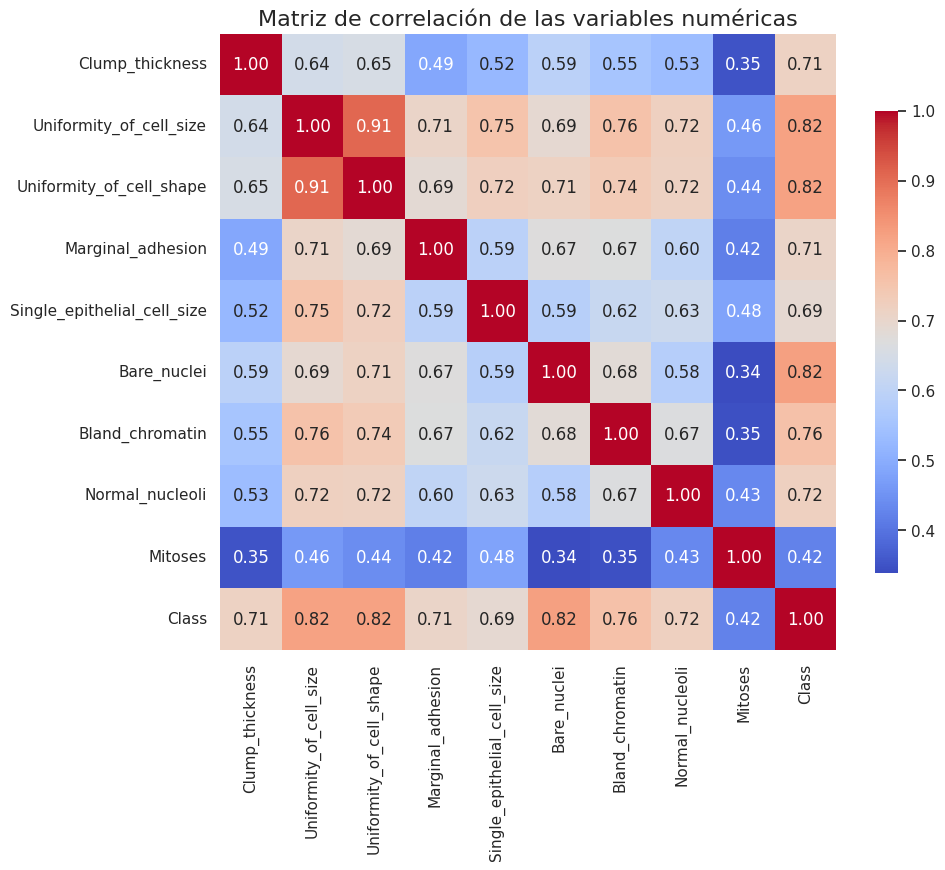

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación para las variables numéricas
correlation_matrix = df_01[numerical_columns].corr()

# Configurar el tamaño de la figura para el mapa de calor
plt.figure(figsize=(10, 8))

# Crear el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'shrink': 0.75}, square=True)

# Título del gráfico
plt.title("Matriz de correlación de las variables numéricas", fontsize=16)

# Mostrar el gráfico
plt.show()


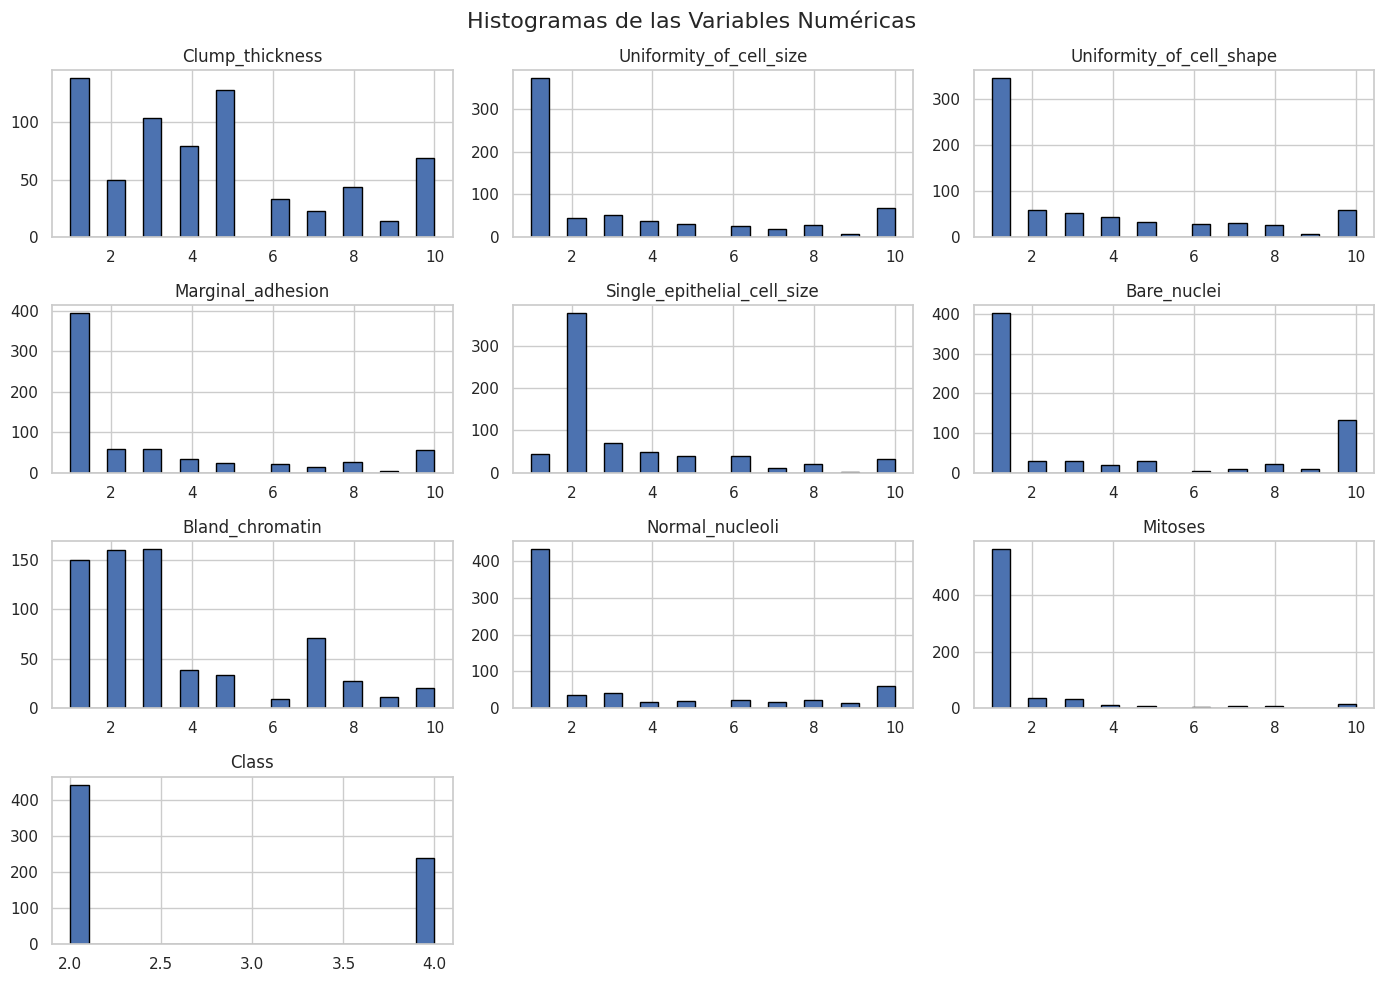

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de Matplotlib para la visualización
sns.set(style="whitegrid")

# 1. Histogramas para las variables numéricas
df_01[numerical_columns].hist(bins=20, figsize=(14, 10), edgecolor='black')
plt.suptitle("Histogramas de las Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


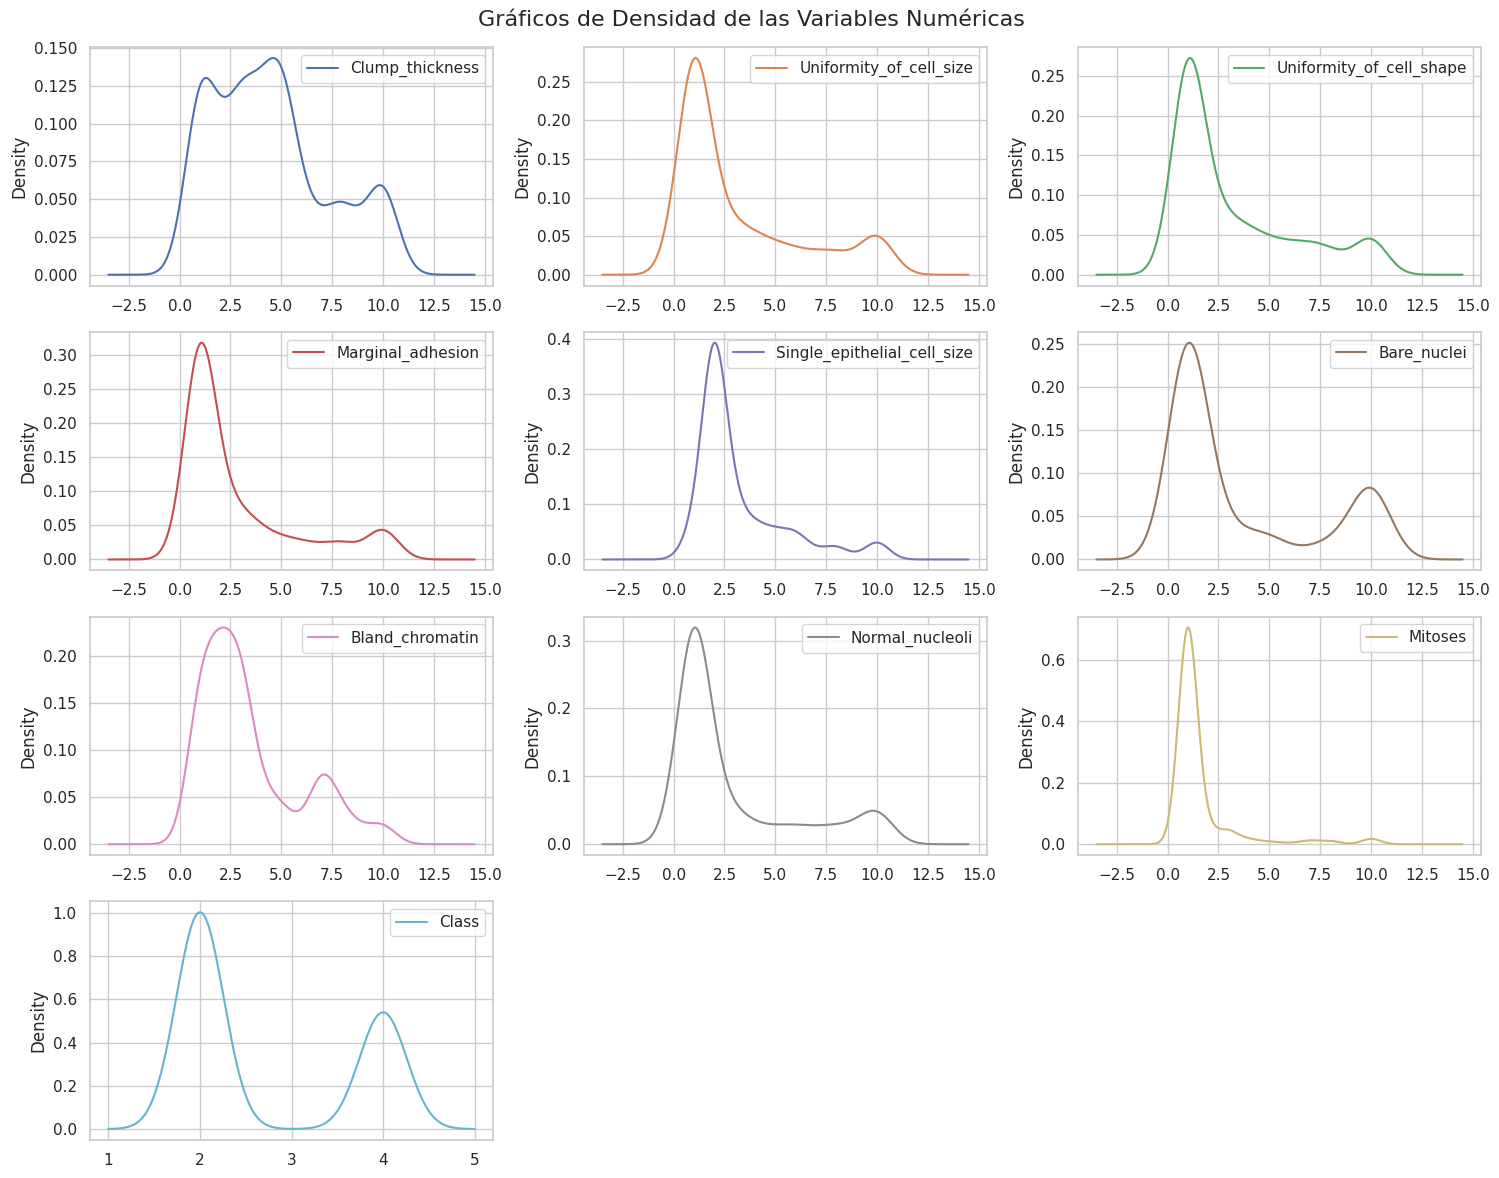

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Configuración de Matplotlib para la visualización
sns.set(style="whitegrid")

# 2. Gráficos de densidad
# Cambiar layout a 4 filas y 3 columnas para poder visualizar todas las variables
df_01[numerical_columns].plot(kind='density', subplots=True, layout=(4, 3), figsize=(15, 12), sharex=False)
plt.suptitle("Gráficos de Densidad de las Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()

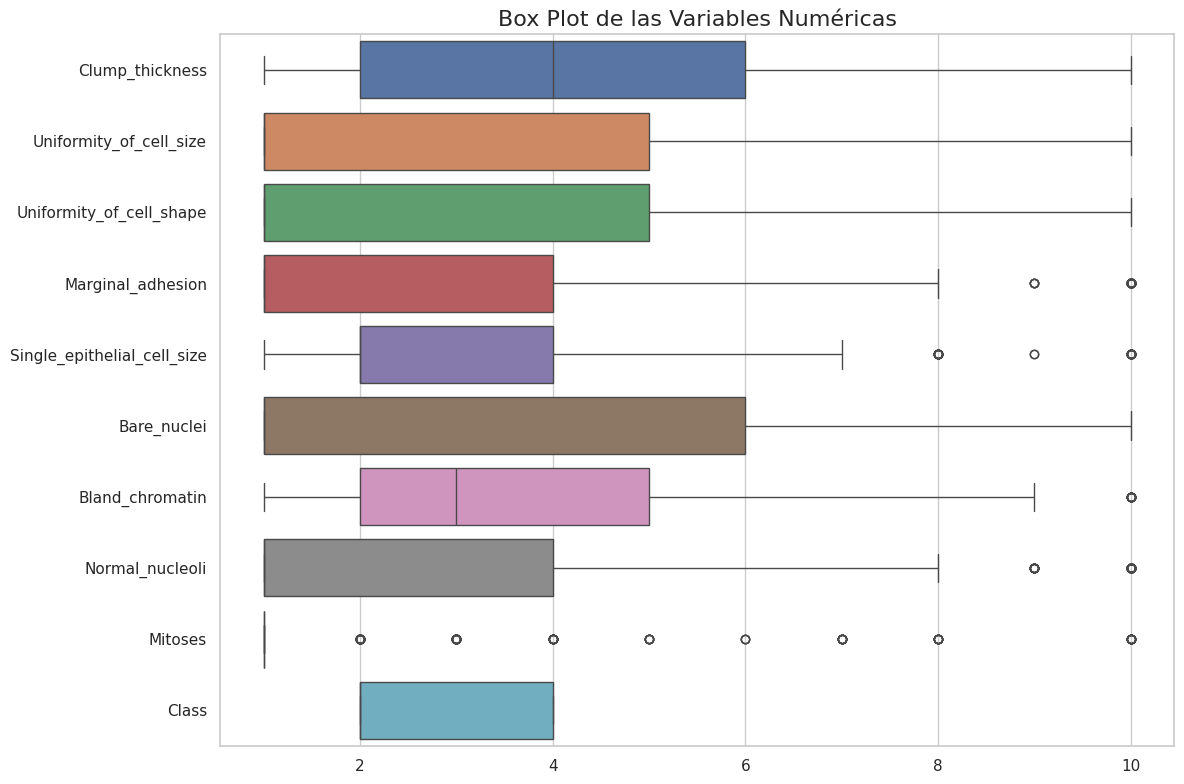

In [31]:

# 3. Box Plot (diagrama de cajas)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_01[numerical_columns], orient='h')
plt.title("Box Plot de las Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()



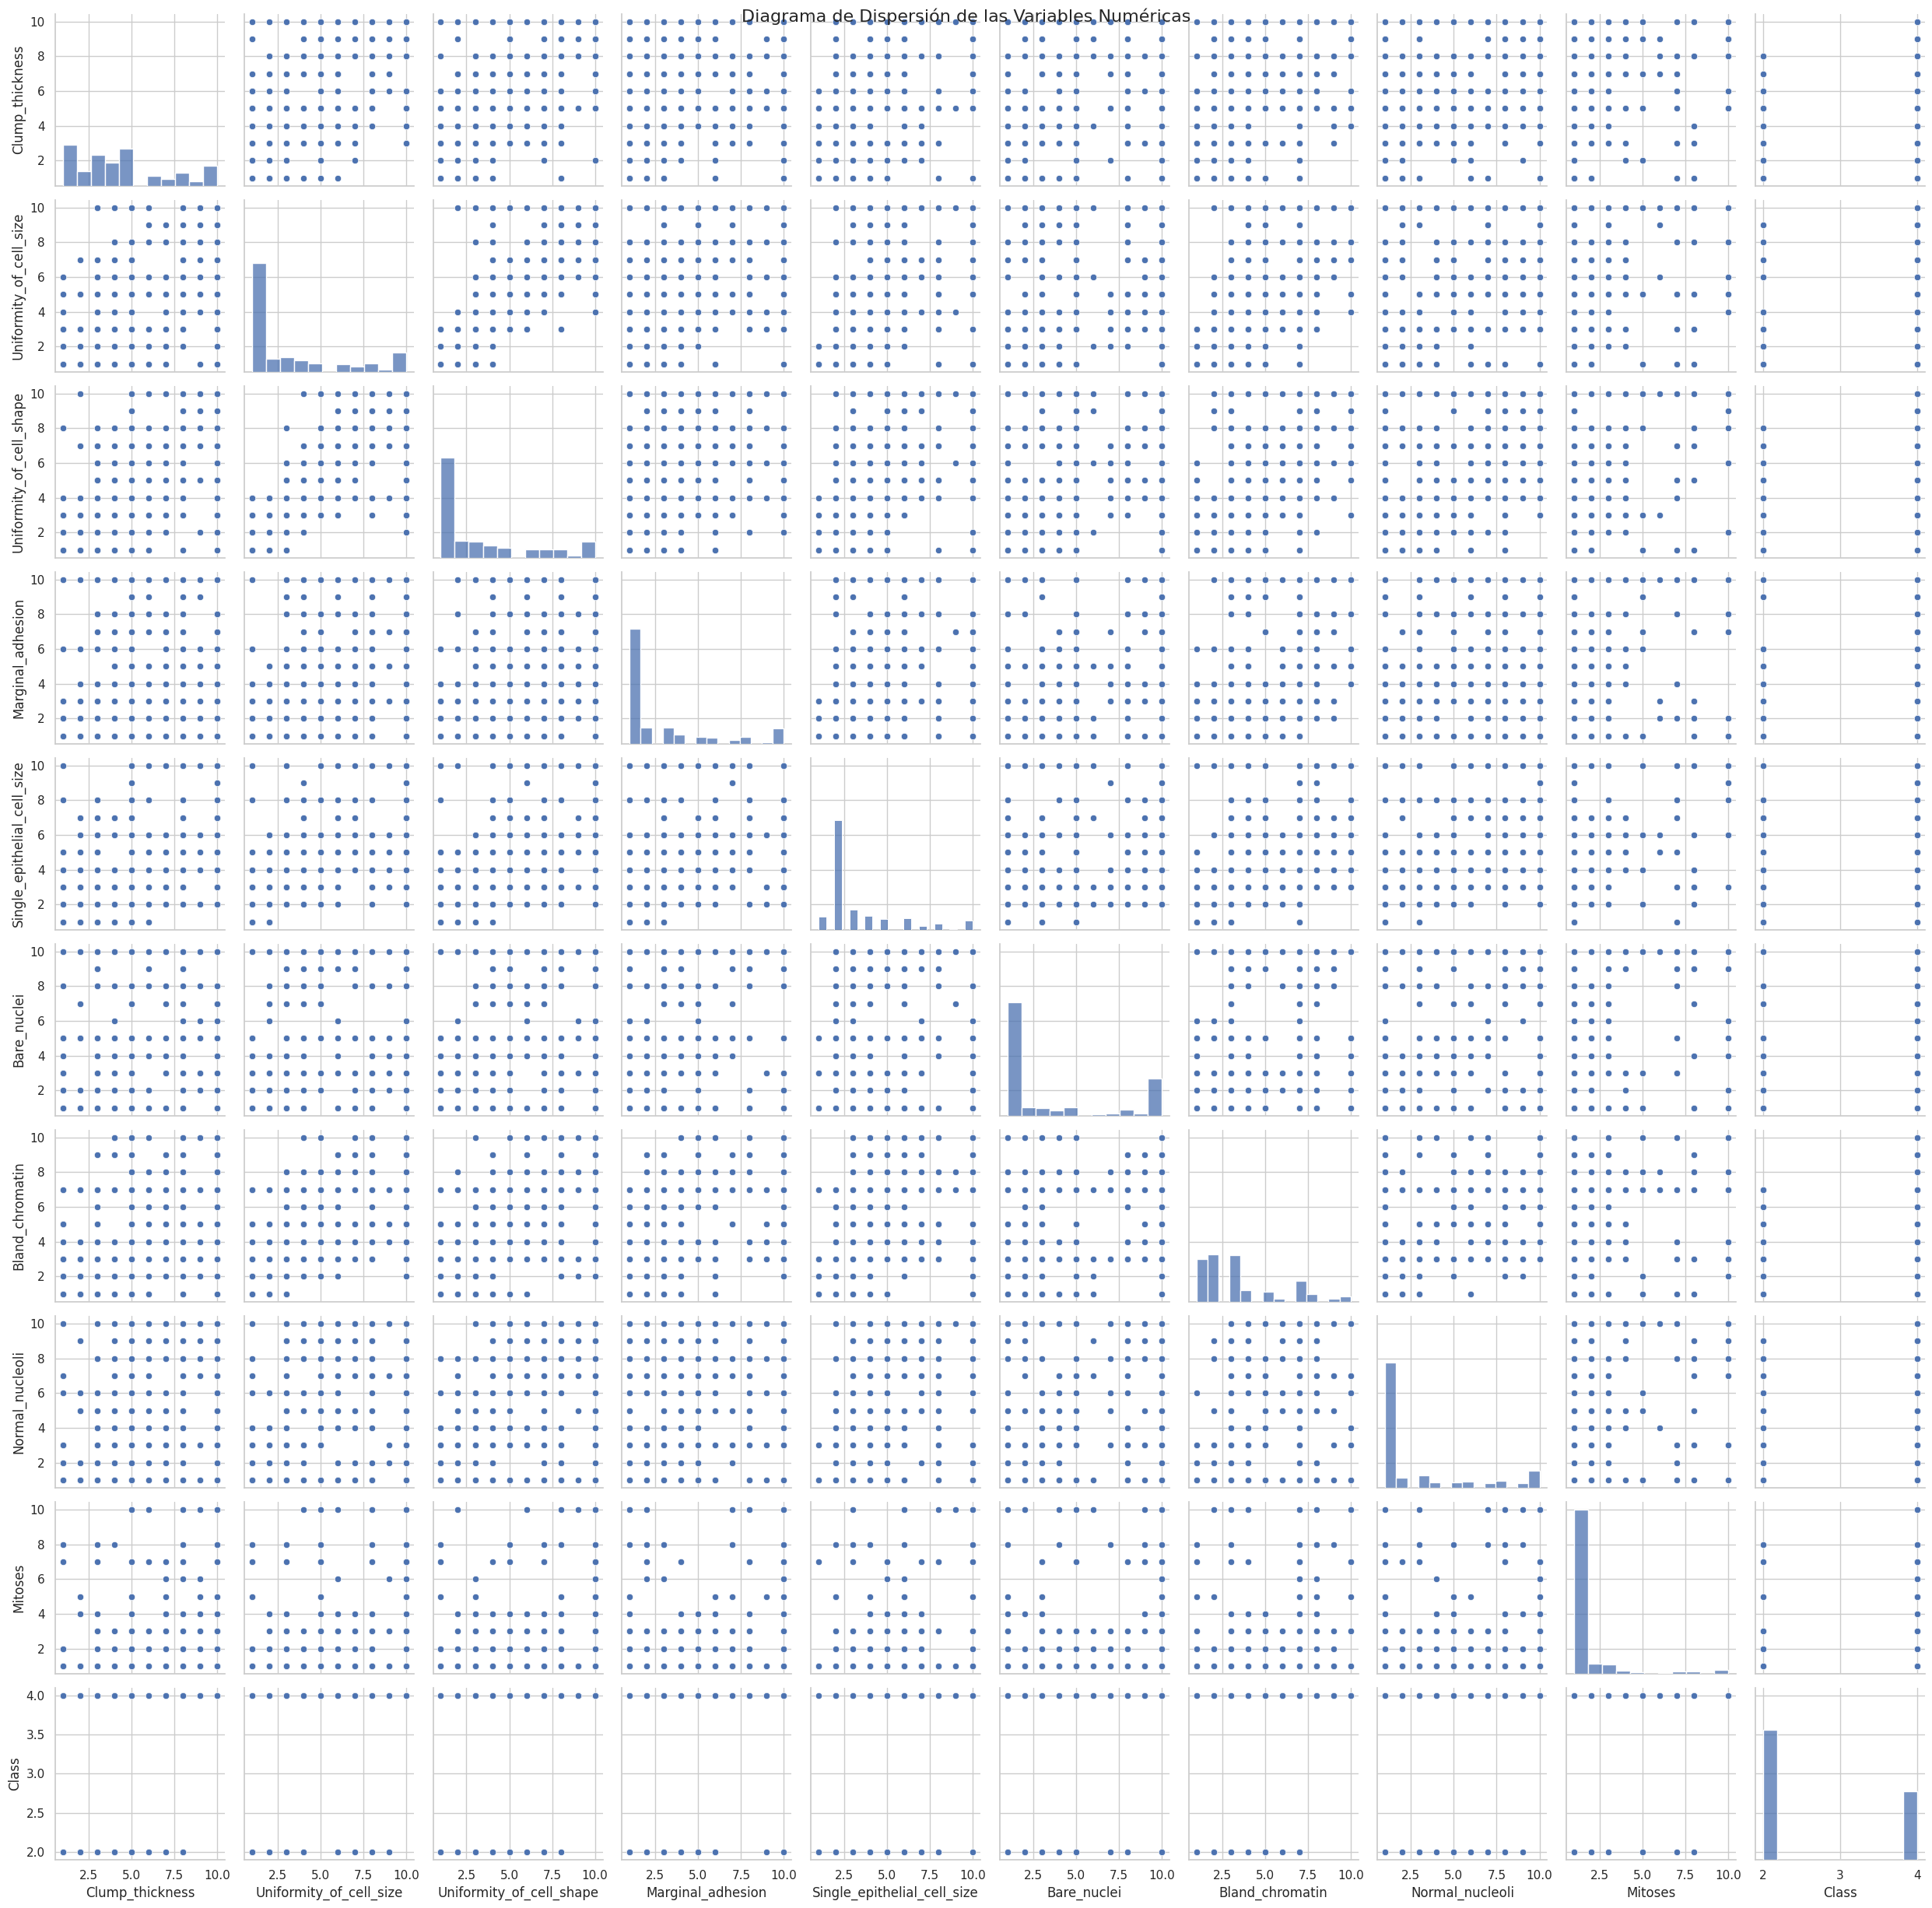

In [ ]:
# 4. Diagramas de dispersión (pairplot de Seaborn para ver relaciones entre variables)
sns.pairplot(df_01[numerical_columns])
plt.suptitle("Diagrama de Dispersión de las Variables Numéricas", fontsize=16)
plt.tight_layout()
plt.show()


In [32]:
from sklearn.model_selection import train_test_split

# Separar las características y las etiquetas
X = df_01[numerical_columns]
y = df_01['Class']

# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (546, 10)
Tamaño del conjunto de prueba: (137, 10)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Crear el clasificador k-NN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Realizar predicciones
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Medir la precisión
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Precisión en entrenamiento: {train_accuracy * 100:.2f}%")
print(f"Precisión en prueba: {test_accuracy * 100:.2f}%")


Precisión en entrenamiento: 97.80%
Precisión en prueba: 96.35%
